# Objective
- What is the average daily,weekly revenue?
- What is the overall weekly revenue trend?
- Product Analysis
    - What is the avg order volume or Sales trend per week and product?
        - Which one is the most ordered Products per week?
    - Which are the top products with most revenue per order/avg order value?
- Provider Analysis
    - What are the top providers (i.e. most revenue per order)?
    - Which one is the Most proactive providers per week (orders served per week)?

## Importing Required Libraries

In [1]:
# data manipulation
import os
import pandas as pd
import numpy as np

# data visulaization
from scripts.visualization import plot_line_graph
from scripts.visualization import plot_bargraph
from scripts.visualization import plot_highlighted_sphagetti_graph

# generate analytics report
from scripts.generate_analytics_report import PDF

# custom functions
from scripts.utils import read_xlsx
from scripts.utils import extract_date_features
from scripts.utils import group_by_and_sum_rows
from scripts.utils import resolve_converted_wide_table_index_issue

## Importing the data set

In [2]:
data = read_xlsx('Data Analyst - Recruiting Task - Commission Dataset.xlsx', 'data')

## Data Audit

In [3]:
#Cocise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_date   657 non-null    datetime64[ns]
 1   product      657 non-null    object        
 2   provider     657 non-null    object        
 3   order_count  657 non-null    float64       
 4   revenue      657 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 25.8+ KB


In [4]:
#Check first 5 rows
data.head()

,order_date,product,provider,order_count,revenue
0,2021-06-21,D,roadrunner,26.0,1789.90
1,2021-06-21,D,micky_mouse,9.0,540.78
2,2021-06-21,A,micky_mouse,7.0,567.25
3,2021-06-21,A,roadrunner,8.0,666.50
4,2021-06-21,D,donald_duck,7.0,435.77


In [5]:
#Check Last 5 rows
data.tail()

,order_date,product,provider,order_count,revenue
652,2021-06-08,B,tom_jerry,0.0,7.25
653,2021-06-20,A,donald_duck,2.0,124.75
654,2021-06-05,D,tom_jerry,0.0,3.75
655,2021-06-20,D,donald_duck,1.0,49.76
656,2021-06-02,D,tom_jerry,0.0,1.38


In [6]:
#Getting descriptive statistics
data.describe()

,order_count,revenue
count,657.000000,657.000000
mean,7.554033,482.480761
std,4.817450,325.282317
min,0.000000,1.380000
25%,4.000000,269.250000
50%,7.000000,431.750000
75%,10.000000,634.750000
max,38.000000,3498.750000


### Exploratory data analysis

##### Feature Engineering
Extract Date Features i.e. year, month, week, dayofweek

In [7]:
data['month'] = extract_date_features(data, 
                      date_column='order_date',
                      feature_name='month')

data['year'] = extract_date_features(data, 
                      date_column='order_date',
                      feature_name='year')

data['dayofweek'] = extract_date_features(data, 
                      date_column='order_date',
                      feature_name='dayofweek')

data['week'] = extract_date_features(data, 
                      date_column='order_date',
                      feature_name='week')
data

,order_date,product,provider,order_count,revenue,month,year,dayofweek,week
0,2021-06-21,D,roadrunner,26.0,1789.90,6,2021,0,25
1,2021-06-21,D,micky_mouse,9.0,540.78,6,2021,0,25
2,2021-06-21,A,micky_mouse,7.0,567.25,6,2021,0,25
3,2021-06-21,A,roadrunner,8.0,666.50,6,2021,0,25
4,2021-06-21,D,donald_duck,7.0,435.77,6,2021,0,25
...,...,...,...,...,...,...,...,...,...
652,2021-06-08,B,tom_jerry,0.0,7.25,6,2021,1,23
653,2021-06-20,A,donald_duck,2.0,124.75,6,2021,6,24
654,2021-06-05,D,tom_jerry,0.0,3.75,6,2021,5,22
655,2021-06-20,D,donald_duck,1.0,49.76,6,2021,6,24


Get time duraion of the dataset

In [8]:
print('Min Date found:',data.order_date.min(), '\nMax Date found:',data.order_date.max())
total_duration = (data.order_date.max()-data.order_date.min()).days
print('Total duration: {} days'.format(total_duration))

Min Date found: 2021-05-01 00:00:00 
Max Date found: 2021-06-30 00:00:00
Total duration: 60 days


#### What is the Average daily,weekly revenue?

In [9]:
print('Average revenue per day in the last 2 months:', data.revenue.sum()/(data.order_date.max()-data.order_date.min()).days)
avg_rev_per_week = round(data.revenue.sum()/data.week.nunique())
print('Average revenue per week in the last 2 months:', avg_rev_per_week)

Average revenue per day in the last 2 months: 5283.164333333333
Average revenue per week in the last 2 months: 31699


#### What is the overall weekly revenue trend?

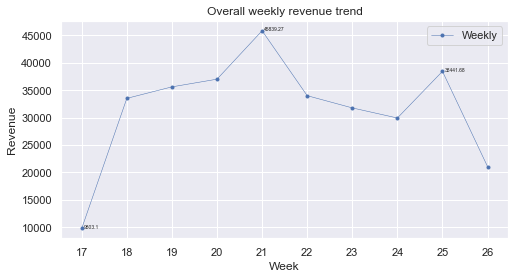

In [10]:
df_trend = data[['week', 'revenue']].groupby('week').sum()

plot_line_graph(df_trend['revenue'],
           x_label = 'Revenue',
           y_label = 'Week',
           trend_label = 'Weekly',
           title='Overall weekly revenue trend',
           save_path='plots')
del df_trend

### Product Analysis

#### What is the avg order volume or Sales trend per week and product?

Calculate total orders per week

In [11]:
df_weekly_trend_by_product = group_by_and_sum_rows(data, 
                                                     group_by_columns=['week', 'product'], 
                                                     column_to_sum = 'order_count',
                                                     resulted_column_name='total_orders')
avg_order_per_week = round(df_weekly_trend_by_product.total_orders.sum()/df_weekly_trend_by_product.week.nunique())
print('Average order per week in last 2 months ~ {}'.format(avg_order_per_week))

print('Average Revenue per order in last 2 months: {}'.format(avg_rev_per_week/avg_order_per_week))

df_weekly_trend_by_product

Average order per week in last 2 months ~ 496
Average Revenue per order in last 2 months: 63.909274193548384


,week,product,total_orders
0,17,A,36.0
1,17,B,17.0
2,17,C,65.0
3,17,D,38.0
4,18,A,127.0
5,18,B,46.0
6,18,C,192.0
7,18,D,138.0
8,19,A,162.0
9,19,B,62.0


Product B has 0 orders in week 23 and 24. Let's check the org data

In [12]:
data[(data['product']=='B') & (data['week']==24)]

,order_date,product,provider,order_count,revenue,month,year,dayofweek,week


In [13]:
data[(data['product']=='B') & (data['week']==23)]

,order_date,product,provider,order_count,revenue,month,year,dayofweek,week
648,2021-06-11,B,tom_jerry,0.0,7.25,6,2021,4,23
652,2021-06-08,B,tom_jerry,0.0,7.25,6,2021,1,23


- For average order value we must change total_orders for week 23 either to 0 or simply take average order value as 0.

Plot Sales trend per week

In [14]:
# Transform table to wider format for sphagetti graph. Dividing total orders by 7 to get order volume
wide_df = df_weekly_trend_by_product.pivot(index='week', columns='product', values='total_orders')/7
wide_df

product,A,B,C,D
week,,,,
17,5.142857,2.428571,9.285714,5.428571
18,18.142857,6.571429,27.428571,19.714286
19,23.142857,8.857143,27.714286,18.142857
20,20.714286,10.571429,27.714286,25.857143
21,28.571429,15.857143,30.428571,26.428571
22,18.285714,7.285714,27.000000,20.571429
23,17.857143,0.000000,28.857143,25.571429
24,16.000000,NaN,28.571429,25.142857
25,18.285714,7.142857,28.000000,33.285714


In [15]:
#fill na value with 1
wide_df = wide_df.fillna(0)
wide_df = resolve_converted_wide_table_index_issue(wide_df)
wide_df

product,index,A,B,C,D
0,17,5.142857,2.428571,9.285714,5.428571
1,18,18.142857,6.571429,27.428571,19.714286
2,19,23.142857,8.857143,27.714286,18.142857
3,20,20.714286,10.571429,27.714286,25.857143
4,21,28.571429,15.857143,30.428571,26.428571
5,22,18.285714,7.285714,27.000000,20.571429
6,23,17.857143,0.000000,28.857143,25.571429
7,24,16.000000,0.000000,28.571429,25.142857
8,25,18.285714,7.142857,28.000000,33.285714
9,26,9.714286,6.571429,14.571429,18.142857


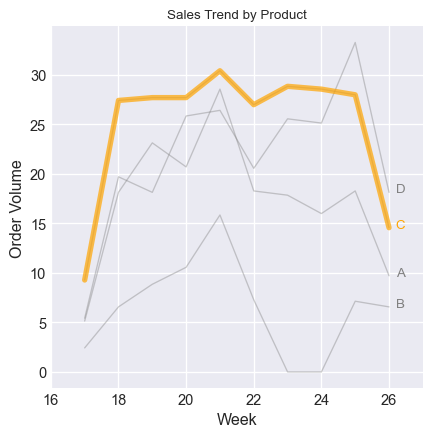

In [16]:
plot_highlighted_sphagetti_graph(wide_df,
                                 unique_index_name = 'index',
                                 highlight_column='C',
                                 y_label='Order Volume',
                                 x_label='Week',
                                 title = "Sales Trend by Product",
                                 save_path='plots',
                                 save_file='product_sales_trend.png')

### What are the top products with most revenue per order/avg order value?

In [17]:
#group by week and product and calculate total revenue
df_weekly_revenue_by_product = data[['week', 'product', 'revenue']].groupby(['week','product'])['revenue'].sum().reset_index()
df_weekly_trend_by_product = df_weekly_trend_by_product.merge(df_weekly_revenue_by_product, how="outer")

#calculate average revenue per order
df_weekly_trend_by_product['avg_order_rev'] = df_weekly_trend_by_product['revenue']/df_weekly_trend_by_product['total_orders']
df_weekly_trend_by_product

,week,product,total_orders,revenue,avg_order_rev
0,17,A,36.0,2724.75,75.687500
1,17,B,17.0,776.80,45.694118
2,17,C,65.0,3912.17,60.187231
3,17,D,38.0,2389.38,62.878421
4,18,A,127.0,10145.75,79.887795
5,18,B,46.0,2237.84,48.648696
6,18,C,192.0,11489.48,59.841042
7,18,D,138.0,9638.38,69.843333
8,19,A,162.0,12057.25,74.427469
9,19,B,62.0,2690.53,43.395645


In [18]:
#replace infinite value with 0
df_weekly_trend_by_product = df_weekly_trend_by_product.replace(np.inf, 0)
df_weekly_trend_by_product

,week,product,total_orders,revenue,avg_order_rev
0,17,A,36.0,2724.75,75.687500
1,17,B,17.0,776.80,45.694118
2,17,C,65.0,3912.17,60.187231
3,17,D,38.0,2389.38,62.878421
4,18,A,127.0,10145.75,79.887795
5,18,B,46.0,2237.84,48.648696
6,18,C,192.0,11489.48,59.841042
7,18,D,138.0,9638.38,69.843333
8,19,A,162.0,12057.25,74.427469
9,19,B,62.0,2690.53,43.395645


Plot Top products by revenue

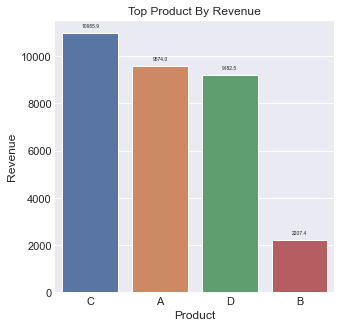

In [19]:
plot_bargraph(df_weekly_trend_by_product,
                  x_axis_column='product',
                  y_axis_column='revenue',
                  x_label_name= 'Product',
                  y_label_name='Revenue',
                  title='Top Product By Revenue',
                  save_file='top_products.png',
                  save_path = 'plots')

Plot Top products by revenue generated per order

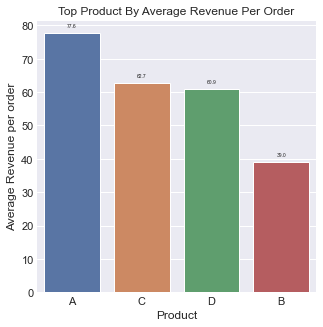

In [20]:
plot_bargraph(df_weekly_trend_by_product,
                  x_axis_column='product',
                  y_axis_column='avg_order_rev',
                  x_label_name= 'Product',
                  y_label_name='Average Revenue per order',
                  title='Top Product By Average Revenue Per Order',
                  save_file='top_products_avg_rev.png',
                  save_path = 'plots')

Which one is the most ordered Product?

In [21]:
weekly_order_by_products = df_weekly_trend_by_product.groupby(['week','product'])['total_orders'].mean().reset_index()
weekly_order_by_products = weekly_order_by_products.groupby(['product'])['total_orders'].mean()

demandable_product = weekly_order_by_products.idxmax()
demandable_product_orders = weekly_order_by_products.max()
print("Most Ordered Product: '{}'  ~{} orders per week".format(demandable_product, round(demandable_product_orders)))

Most Ordered Product: 'C'  ~175 orders per week


### Provider Analysis

#### What are the top Providers by Average Order value?

Calculate average order revenue by provider

In [22]:
#Calculate weekly order count by provider
df_weekly_trend_by_provider = group_by_and_sum_rows( data, 
                                                       group_by_columns=['week', 'provider'], 
                                                       column_to_sum = 'order_count',
                                                       resulted_column_name='total_orders')

#group by week and prviders and calculate total revenue
df_weekly_revenue_by_provider = data[['week', 'provider', 'revenue']].groupby(['week','provider'])['revenue'].sum().reset_index()
df_weekly_trend_by_provider = df_weekly_trend_by_provider.merge(df_weekly_revenue_by_provider, how="outer")

df_weekly_trend_by_provider

#Calculate average revenue per order
df_weekly_trend_by_provider['avg_order_rev'] = df_weekly_trend_by_provider['revenue']/df_weekly_trend_by_provider['total_orders']
df_weekly_trend_by_provider

,week,provider,total_orders,revenue,avg_order_rev
0,17,donald_duck,26.0,1637.33,62.974231
1,17,micky_mouse,55.0,3453.92,62.798545
2,17,roadrunner,61.0,4014.80,65.816393
3,17,tom_jerry,14.0,697.05,49.789286
4,18,donald_duck,88.0,6277.72,71.337727
5,18,micky_mouse,143.0,9537.82,66.698042
6,18,roadrunner,235.0,15755.32,67.043915
7,18,tom_jerry,37.0,1940.59,52.448378
8,19,donald_duck,98.0,6465.03,65.969694
9,19,micky_mouse,156.0,10552.85,67.646474


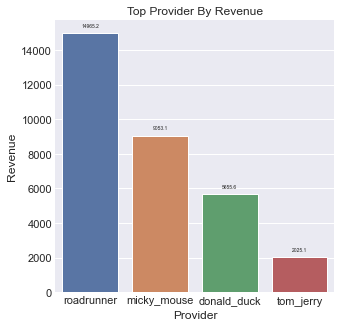

In [23]:
plot_bargraph(df_weekly_trend_by_provider,
                  x_axis_column='provider',
                  y_axis_column='revenue',
                  x_label_name= 'Provider',
                  y_label_name='Revenue',
                  title='Top Provider By Revenue',
                  save_file='top_providers.png',
                  save_path = 'plots')

Plot Top Providers by Average Revenue Per Order

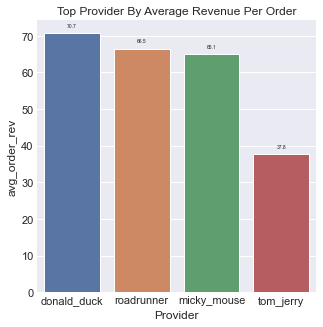

In [24]:
plot_bargraph(df_weekly_trend_by_provider,
                  x_axis_column='provider',
                  y_axis_column='avg_order_rev',
                  x_label_name= 'Provider',
                  y_label_name='avg_order_rev',
                  title='Top Provider By Average Revenue Per Order',
                  save_file='top_providers_avg_rev.png',
                  save_path = 'plots')

In [25]:
# Transform table to wider format for plotting sphagetti graph
wide_df = df_weekly_trend_by_provider[['week', 'provider', 'revenue']].pivot(index='week', columns='provider', values='revenue')
wide_df.head()

provider,donald_duck,micky_mouse,roadrunner,tom_jerry
week,,,,
17,1637.33,3453.92,4014.80,697.05
18,6277.72,9537.82,15755.32,1940.59
19,6465.03,10552.85,16183.40,2407.78
20,6593.91,11205.20,16523.45,2686.30
21,8019.51,13787.12,19844.26,4188.38


In [26]:
wide_df = resolve_converted_wide_table_index_issue(wide_df)
wide_df.head()

provider,index,donald_duck,micky_mouse,roadrunner,tom_jerry
0,17,1637.33,3453.92,4014.80,697.05
1,18,6277.72,9537.82,15755.32,1940.59
2,19,6465.03,10552.85,16183.40,2407.78
3,20,6593.91,11205.20,16523.45,2686.30
4,21,8019.51,13787.12,19844.26,4188.38


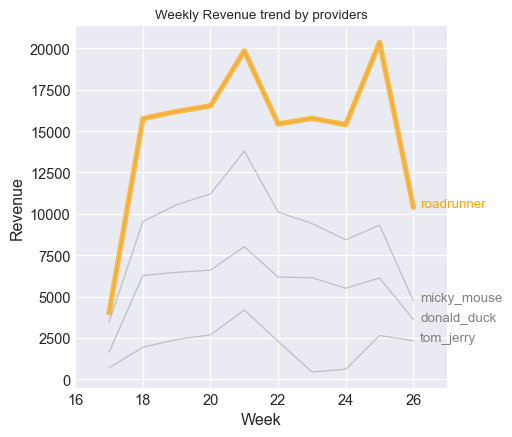

In [27]:
plot_highlighted_sphagetti_graph(wide_df,
                    unique_index_name = 'index',
                    highlight_column='roadrunner',
                    y_label='Revenue',
                    x_label='Week',
                    title = "Weekly Revenue trend by providers",
                    save_path='plots',
                    save_file='provider_revenue_trend.png')

### Which one is the Most proactive providers per week (orders served per week)?

In [28]:
weekly_order_by_providers = df_weekly_trend_by_provider.groupby(['week','provider'])['total_orders'].mean().reset_index()
weekly_order_by_providers = weekly_order_by_providers.groupby(['provider'])['total_orders'].mean()

proactive_provider = weekly_order_by_providers.idxmax()
proactive_provider_orders = weekly_order_by_providers.max()
print("Most Ordered Product: '{}'  ~{} orders per week".format(proactive_provider, round(proactive_provider_orders)))

Most Ordered Product: 'roadrunner'  ~225 orders per week


## Generate Report 

In [29]:
pdf = PDF()
pdf.create_analytics_report(page_1_txt1='Average orders per week: ~{}'.format(avg_order_per_week),
                            page_1_txt2='Average Revenue per order: ~{}'.format(round(avg_rev_per_week/avg_order_per_week)),
                            page_2_text="Most Desirable Product: '{}' ~{} orders".format(demandable_product, \
                                                                                              round(demandable_product_orders)),
                            page_3_text="Most Proactive Provider: '{}' ~{} orders".format(proactive_provider, \
                                                                                              round(proactive_provider_orders)),
                            page_1_img_path="./plots/trend.png",
                            page_2_img_path1="./plots/top_products.png",
                            page_2_img_path2="./plots/top_products_avg_rev.png",
                            page_2_img_path3="./plots/product_sales_trend.png",
                            page_3_img_path1="./plots/top_providers_avg_rev.png",
                            page_3_img_path2="./plots/provider_revenue_trend.png",
                            save_filename="analytics_report.pdf")

Report Succesfully generated!
